In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('framingham.csv')

print('First 5 rows:\n', data.head())
print('\nGeneral Info about data set:\n', data.info())
print('\nDescriptive Statistics:\n', data.describe())

First 5 rows:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1  

In [3]:
## Check if we have missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [4]:
## Replace null values with median and modulo values
# Median
for col in ['glucose', 'totChol', 'BMI', 'heartRate', 'cigsPerDay']:
    if col in data.columns:
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)
        print(f"Column '{col}' with median: {median_val}")

# Modulo
for col in ['education', 'BPMeds']:
    if col in data.columns:
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)
        print(f"Column '{col}' with mode: {mode_val}")

print("\nNull Values after data updated:\n", data.isnull().sum())
print("\n\nFirst 5 rows after update:\n", data.head())

Column 'glucose' with median: 78.0
Column 'totChol' with median: 234.0
Column 'BMI' with median: 25.4
Column 'heartRate' with median: 75.0
Column 'cigsPerDay' with median: 0.0
Column 'education' with mode: 1.0
Column 'BPMeds' with mode: 0.0

Null Values after data updated:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


First 5 rows after update:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0       

In [6]:
## Chech the VIF
X = data.drop('TenYearCHD', axis=1)
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("VIF (Variance Inflation Factor):\n", vif_data.sort_values(by='VIF', ascending=False))

VIF (Variance Inflation Factor):
             feature         VIF
0             const  198.593483
11            sysBP    3.736727
12            diaBP    2.964020
5        cigsPerDay    2.574034
4     currentSmoker    2.454220
8      prevalentHyp    2.053330
15          glucose    1.611435
9          diabetes    1.589285
2               age    1.373069
13              BMI    1.236652
1              male    1.193389
10          totChol    1.106865
6            BPMeds    1.100912
14        heartRate    1.095422
3         education    1.054560
7   prevalentStroke    1.019034


In [7]:
# Now let's find if our dataset is asymmetry or symmetry
# If asymmetry is near 0, the distribution is symmetric
# asymmetry > 1, the distribution is asymmetric to right
# asymmetry < -1, the distribution is asymmetric to left 

print("Asymmetry for numeric vars:\n")
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    print(f"{col}: {data[col].skew():.4f}")

Asymmetry for numeric vars:

male: 0.2861
age: 0.2281
education: 0.7249
currentSmoker: 0.0236
cigsPerDay: 1.2575
BPMeds: 5.5884
prevalentStroke: 12.9091
prevalentHyp: 0.8193
diabetes: 5.9944
totChol: 0.8787
sysBP: 1.1454
diaBP: 0.7141
BMI: 0.9854
heartRate: 0.6446
glucose: 6.5415


In [9]:
# Scaling numerical data
numerical_cols_to_scale =[
    'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

scaler = StandardScaler()
data[numerical_cols_to_scale] = scaler.fit_transform(data[numerical_cols_to_scale])

print("First 5 rows after scaling:\n", data.head())
print("\n\nDescriptive stats for scaling cols:\n", data[numerical_cols_to_scale].describe())

First 5 rows after scaling:
    male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0     1 -1.234951        4.0              0   -0.751322     0.0   
1     0 -0.418257        2.0              0   -0.751322     0.0   
2     1 -0.184916        1.0              1    0.929210     0.0   
3     0  1.331800        3.0              1    1.769476     0.0   
4     0 -0.418257        3.0              1    1.181289     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0 -0.940600 -1.195907 -1.082625   
1                0             0         0  0.300313 -0.515187 -0.158988   
2                0             0         0  0.187503 -0.220209 -0.242955   
3                0             1         0 -0.263739  0.800871  1.016549   
4                0             0         0  1.089985 -0.106755  0.092912   

        BMI  heartRate   glucose  TenYearCHD  
0  0.287379   0.342761 -0.201359           0  
1  0.719752   1.5

In [10]:
# Split the data
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now the data is splited
print(f"The size of train data set (X_train): {X_train.shape}")
print(f"The size of test data set (X_test): {X_test.shape}")
print(f"The size of y_train: {y_train.shape}")
print(f"The size of y_test: {y_test.shape}")
print(f"Distr. classes in y_train:\n {y_train.value_counts(normalize=True)}")
print(f"Distr. classes in y_test:\n {y_test.value_counts(normalize=True)}")

The size of train data set (X_train): (3390, 15)
The size of test data set (X_test): (848, 15)
The size of y_train: (3390,)
The size of y_test: (848,)
Distr. classes in y_train:
 TenYearCHD
0    0.846608
1    0.153392
Name: proportion, dtype: float64
Distr. classes in y_test:
 TenYearCHD
0    0.853774
1    0.146226
Name: proportion, dtype: float64


In [11]:
# Implementing GD ( Gradient Descent )
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon= 1e-8
    cost = (-1/m) * (np.sum(y * np.log(h + epsilon)) + np.sum((1 - y) * np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=5000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [12]:
# Add column with 1 for X_train and X_test
X_train_gd = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_gd = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

y_train_gd = y_train.to_numpy().reshape(-1, 1)
y_test_gd = y_test.to_numpy().reshape(-1, 1)

In [13]:
# Theta params
num_features = X_train_gd.shape[1]
initial_theta = np.zeros((num_features, 1))

In [14]:
# Train the data with GD
final_theta, cost_history = gradient_descent(X_train_gd, y_train_gd.reshape(-1, 1), initial_theta, learning_rate=0.1, iterations=10000)

In [15]:
# This is the end for training data
print("Coef. (Theta) for GD:\n", final_theta)

Coef. (Theta) for GD:
 [[-2.27698406]
 [ 0.42874253]
 [ 0.57551464]
 [ 0.0386865 ]
 [-0.04523677]
 [ 0.29077033]
 [ 0.26067997]
 [ 0.65554207]
 [ 0.19817069]
 [ 0.00256448]
 [ 0.03835164]
 [ 0.30877463]
 [ 0.01889393]
 [-0.01973212]
 [-0.06567796]
 [ 0.18969692]]


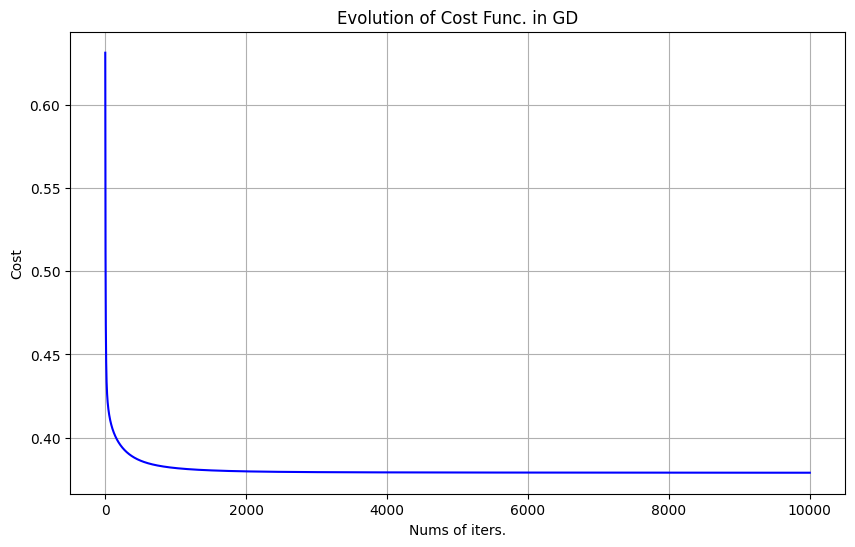

In [16]:
# Graph for cost function
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Evolution of Cost Func. in GD')
plt.xlabel('Nums of iters.')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [17]:
# Prediction based on test data set
probabilities = sigmoid(X_test_gd.dot(final_theta))

# You can set the value and see how accuracy will change
y_pred_gd = (probabilities >= 0.3).astype(int)

In [18]:
# Lets see the performance
accuracy_gd = accuracy_score(y_test_gd, y_pred_gd)
conf_matrix_gd = confusion_matrix(y_test_gd, y_pred_gd)
class_report_gd = classification_report(y_test_gd, y_pred_gd)

print(f"Accuracy of the model for test data set: {accuracy_gd:.4f}")
print("\nConf. Matrix:\n", conf_matrix_gd)
print("\nReport Classification:\n", class_report_gd)

Accuracy of the model for test data set: 0.8101

Conf. Matrix:
 [[655  69]
 [ 92  32]]

Report Classification:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       724
           1       0.32      0.26      0.28       124

    accuracy                           0.81       848
   macro avg       0.60      0.58      0.59       848
weighted avg       0.79      0.81      0.80       848



In [19]:
# Save the model
with open('heart_disease_theta.pkl', 'wb') as f:
    pickle.dump(final_theta, f)

with open('heart_disease_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model saved successfully!")

Model saved successfully!
